In [2]:
from pycaret.classification import *
import shap
import pandas as pd

In [3]:
binary = pd.read_csv('Elongation_tiny_class.csv')
multi = pd.read_csv('iris.csv')

In [5]:
s_binary = setup(binary, target='ElongOK')

,Description,Value
0,session_id,3449
1,Target,ElongOK
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(385, 18)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
top_binary = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9627,0.9765,0.9889,0.9242,0.9505,0.9215,0.9285,0.0140
catboost,CatBoost Classifier,0.9588,0.9763,0.9764,0.9194,0.9443,0.9123,0.9164,2.6450
lda,Linear Discriminant Analysis,0.9551,0.9686,0.9875,0.9070,0.9398,0.9051,0.9137,0.0090
rf,Random Forest Classifier,0.9514,0.9760,0.9542,0.9144,0.9322,0.8948,0.8970,0.1330
ridge,Ridge Classifier,0.9479,0.0000,0.9431,0.9242,0.9248,0.8855,0.8953,0.0080
xgboost,Extreme Gradient Boosting,0.9477,0.9816,0.9417,0.9172,0.9260,0.8860,0.8896,0.1150
et,Extra Trees Classifier,0.9440,0.9572,0.9292,0.9194,0.9192,0.8767,0.8823,0.1020
gbc,Gradient Boosting Classifier,0.9403,0.9762,0.9194,0.9105,0.9123,0.8672,0.8700,0.0440
lightgbm,Light Gradient Boosting Machine,0.9403,0.9770,0.9306,0.9072,0.9148,0.8693,0.8735,0.0850
ada,Ada Boost Classifier,0.9328,0.9731,0.8972,0.9080,0.8997,0.8493,0.8523,0.0540


In [9]:
X_train = get_config('X_train')

In [122]:
model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.8611,0.8889,0.7273,0.8000,0.6842,0.6929
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8519,0.8056,0.6667,0.8571,0.7500,0.6471,0.6574
3,0.9259,0.8889,0.7778,1.0000,0.8750,0.8235,0.8367
4,0.9630,0.9444,0.8889,1.0000,0.9412,0.9143,0.9177
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8148,0.8056,0.7778,0.7000,0.7368,0.5946,0.5966
7,0.8889,0.8125,0.6250,1.0000,0.7692,0.7011,0.7347
8,0.9630,0.9375,0.8750,1.0000,0.9333,0.9078,0.9117
9,0.8077,0.7569,0.6250,0.7143,0.6667,0.5324,0.5347


In [75]:
global_explainer = shap.Explainer(model, X_train)
shap_values = global_explainer(X_train)

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3449, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

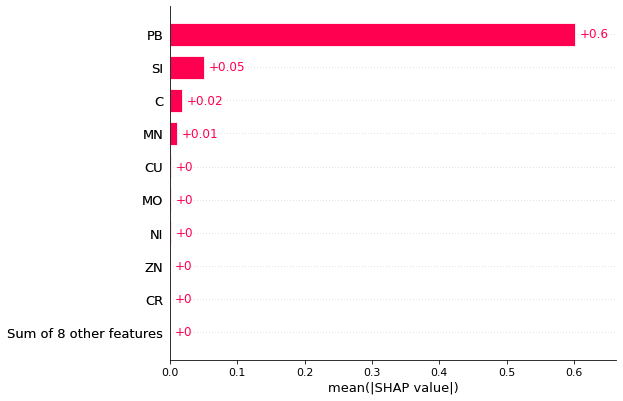

In [71]:
shap.plots.bar(shap_values)

## Doesn't support:

1. KNeighborsClassifier
2. CatBoost Classifier
3. Random Forest Classifier
4. Extra Trees Classifier
5. Ada Boost Classifier
6. Decision Tree Classifier
7. Quadratic Discriminant Analysis
8. Naive Bayes
9. SVM - Radial Kernel (rbfsvm)
10. Gaussian Process Classifier (gpc)
11. MLP Classifier
## All Supports:
1. Linear Discriminant Analysis
2. Ridge Classifier
3. Extreme Gradient Boosting
4. Gradient Boosting Classifier
5. Light Gradient Boosting Machine
6. SVM - Linear Kernel
7. Logistic Regression

In [78]:
def get_shap_kernel(estimator:object,X_train):
    if X_train.shape[1] > 3:
        x_train_summary = shap.kmeans(X_train,3)
    else:
        x_train_summary = shap.kmeans(X_train,X_train.shape[1])
    explainer = shap.KernelExplainer(estimator.predict,x_train_summary)

    size = len(X_train)
    if size < 50:
        size = size
    elif size * 0.2 > 50:
        size = 50
    else:
        size = int(size * 0.2)
    sample_values = shap.sample(X_train, size)
    shap_values = explainer.shap_values(sample_values, lr_reg='num_features(10)')

    return explainer, shap_values,sample_values

In [103]:
explainer, shap_values, sample_values = get_shap_kernel(model, X_train)

  0%|          | 0/50 [00:00<?, ?it/s]

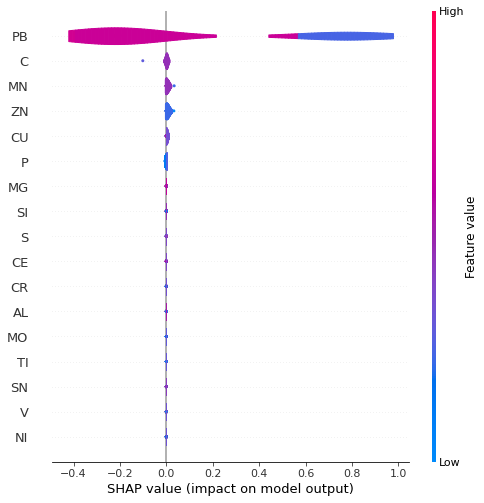

In [104]:
shap.summary_plot(shap_values, sample_values,plot_type="violin")

## Kernel SHAP
### Supports:
1. knn
2. ada
3. qda
4. nb
5. gpc
6. mlp
### Doesn't support:
1. rbfsvm

# Tree SHAP

In [123]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

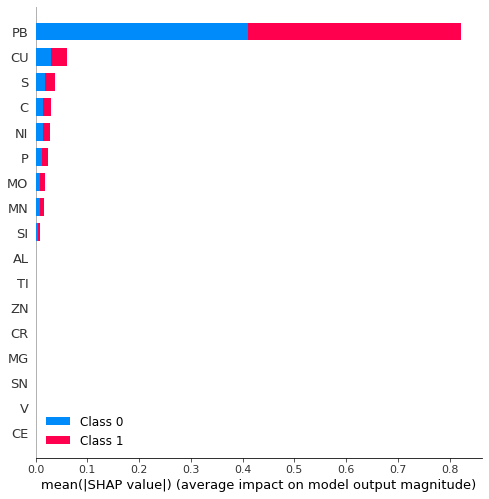

In [126]:
shap.summary_plot(shap_values, X_train)

# support:
1. et  only (bar is suppported)
2. catboost (bar, default, violin)
3. rf (only bar is supported)
3. dt (only bar is supported)

# Multi classes

In [128]:
s_multi= setup(multi, target='variety')

,Description,Value
0,session_id,5513
1,Target,variety
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [129]:
top_multi = compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:58:22
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9700,0.9969,0.9694,0.9770,0.9693,0.9545,0.9585,0.0060
lr,Logistic Regression,0.9609,0.9969,0.9583,0.9697,0.9597,0.9405,0.9456,0.0120
knn,K Neighbors Classifier,0.9609,0.9898,0.9583,0.9697,0.9597,0.9405,0.9456,0.0090
qda,Quadratic Discriminant Analysis,0.9609,1.0000,0.9611,0.9697,0.9600,0.9408,0.9459,0.0060
et,Extra Trees Classifier,0.9409,0.9938,0.9417,0.9502,0.9402,0.9107,0.9157,0.0670
xgboost,Extreme Gradient Boosting,0.9318,0.9585,0.9306,0.9501,0.9294,0.8969,0.9074,0.1010
lightgbm,Light Gradient Boosting Machine,0.9318,0.9726,0.9333,0.9461,0.9303,0.8974,0.9052,0.0600
rf,Random Forest Classifier,0.9309,0.9855,0.9333,0.9382,0.9306,0.8957,0.8994,0.0800
catboost,CatBoost Classifier,0.9309,0.9907,0.9333,0.9418,0.9302,0.8962,0.9021,1.4540
dt,Decision Tree Classifier,0.9218,0.9411,0.9222,0.9381,0.9199,0.8820,0.8911,0.0050


LinAlgError: SVD did not converge

In [130]:
X_train = get_config('X_train')

In [225]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8182,1.0000,0.8333,0.8909,0.8106,0.7317,0.7695
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9000,1.0000,0.9167,0.9250,0.9000,0.8507,0.8636
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9071,0.8889,0.9200,0.8956,0.8462,0.8598
7,0.8000,0.8762,0.8056,0.8000,0.8000,0.6970,0.6970
8,0.9000,0.9429,0.8889,0.9250,0.8971,0.8485,0.8616
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [177]:
global_explainer = shap.Explainer(model, X_train)
shap_values = global_explainer(X_train)

AttributeError: 'TreeEnsemble' object has no attribute 'values'

In [175]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

# Doesn't Support
1. lr
2. knn
3. nb
4. dt
5. svm
6. rbfsvm
7. gpc
8. mlp
9. ridge
10. rf
11. qda
12. ada
13. gbc
14. lda
15. et
16. xgboost
17. lightgbm
18. catboost

# Kernel SHAP

  0%|          | 0/20 [00:00<?, ?it/s]

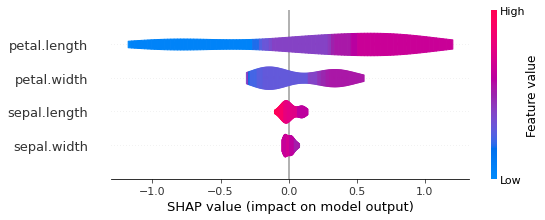

In [206]:
explainer, shap_values, sample_values = get_shap_kernel(model, X_train)
shap.summary_plot(shap_values, sample_values,plot_type="violin")

# Supported
1. lr
2. knn
3. nb
4. svm
5. rbfsvm
6. gpc
7. mlp
8. ridge
9. qda
10. ada
11. gbc
12. lda

# Tree SHAP

In [226]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

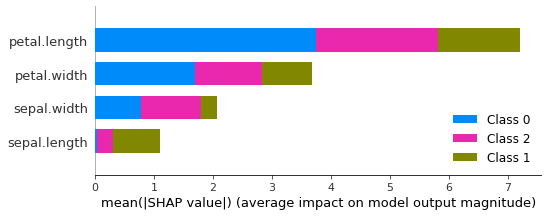

In [227]:
shap.summary_plot(shap_values, X_train)

# support:
1. et  only (bar is suppported)
2. catboost (bar is supported)
3. rf (only bar is supported)
3. dt (only bar is supported)
5. xgboost (only bar)
6. lightgbm (only bar)